# Bases de Datos III: Tarea Nº3 (20%)

## 1. Importacion del dataset

### 1.1 Descripción de los datos

**Track.Name** *(String - cadena de texto)*: 
- Descripción: Nombre de la pista o canción.

**Artist.Name** *(String - cadena de texto)*:
  - Descripción: Nombre del artista o banda que interpreta la canción.

**Genre** *(String - cadena de texto)*:
  - Descripción: Género musical al que pertenece la canción.

**Beats.Per.Minute** *(Integer - entero)*:
  - Descripción: Los latidos por minuto de la canción, un indicativo de su tempo.

**Energy** *(Integer - entero)*:
  - Descripción: Medida de intensidad y actividad.

**Danceability** *(Integer - entero)*:
  - Descripción: Medida de cuán adecuada es una canción para bailar.

**Loudness..dB..** *(Integer - entero)*:
  - Descripción: Volumen de la canción en decibelios.

**Liveness** *(Integer - entero)*:
  - Descripción: Presencia de público en la grabación de la canción. Un valor alto indica que es una grabación en vivo.

**Valence.** *(Integer - entero)*:
  - Descripción: Medida de positividad en la canción.

**Length.** *(Integer - entero)*:
  - Descripción: Duración de la canción en segundos.

**Acousticness..** *(Integer - entero)*:
  - Descripción: Medida que indica cuán acústica es una canción.

**Speechiness.** *(Integer - entero)*:
  - Descripción: Medida que indica la presencia de palabras habladas en la canción.

**Popularity** *(Integer - entero)*:
  - Descripción: Popularidad de la canción en Spotify.

### 1.2 Importacion de los datos

In [210]:
import pandas as pd

# Cargar CSV 
spotify = pd.read_csv("./data/50MasEscuchadosSpotify.csv", encoding='ISO-8859-1')

In [211]:
spotify.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### 1.3 Importacion de librerias

In [218]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Pre-procesamiento de los datos

### 2.1 Selección de los caracteristicas

In [212]:
# Seleccionar características para la agrupación
features = spotify[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Popularity']]

In [213]:
features.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,117,55,76,-6,8,75,191,4,3,79
1,105,81,79,-4,8,61,302,8,9,92
2,190,80,40,-4,16,70,186,12,46,85
3,93,65,64,-8,8,55,198,12,19,86
4,150,65,58,-4,11,18,175,45,7,94


### 2.3 Normalización de los datos

##### 2.3.1 Justificación para el Uso de Estandarización (Z-score Normalization)

La **Estandarización**, también conocida como **Normalización Z-score**, transforma los datos de manera que tengan una media de 0 y una desviación estándar de 1. Esta transformación es crucial por varias razones:

1. **Equilibrio de Escalas:** Las variables en un conjunto de datos pueden tener diferentes unidades y escalas. Por ejemplo, una variable puede estar en kilogramos mientras que otra en centímetros. La estandarización asegura que todas las variables tienen el mismo peso, lo que es esencial para algoritmos que dependen de medidas de distancia, evitando que una variable domine sobre otra.

2. **Optimización del Desempeño de Algoritmos:** Muchos algoritmos de aprendizaje automático y estadística, incluyendo el algoritmo K-means para clustering, tienen un mejor desempeño cuando los datos están estandarizados. Estos algoritmos pueden converger más rápido y producir resultados más precisos.

3. **Interpretabilidad:** Al transformar las variables para que tengan una media de 0 y una desviación estándar de 1, cualquier valor que se aleje significativamente de 0 (ya sea positiva o negativamente) se reconoce fácilmente como un valor que se desvía del promedio.

Dado el propósito del análisis actual, que es resolver un problema de agrupamiento, y la naturaleza de los algoritmos involucrados que se basan en medidas de distancia, la estandarización es una elección natural y adecuada. Esta transformación garantizará que las distancias entre los puntos en el espacio de características sean relevantes y proporcionales, lo que a su vez asegura la formación de clusters coherentes y significativos.

#### 2.3.2 Aplicando normalización de los datos

In [221]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [222]:
features.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,117,55,76,-6,8,75,191,4,3,79
1,105,81,79,-4,8,61,302,8,9,92
2,190,80,40,-4,16,70,186,12,46,85
3,93,65,64,-8,8,55,198,12,19,86
4,150,65,58,-4,11,18,175,45,7,94


## 4. Análisis de clústers

### 4.1 Análisis Partitioning Clustering: MiniBatchKMeans

#### 4.1.1 Justificacion

**¿En qué consiste?**
El algoritmo KMeans busca particionar un conjunto de puntos en K grupos, donde cada punto pertenece al grupo cuyo centroide está más cerca. El algoritmo de "MiniBatch" en MiniBatchKMeans es una variante de KMeans que utiliza mini-lotes para reducir el tiempo de cómputo. Mientras que el algoritmo estándar KMeans utiliza todos los datos disponibles en cada iteración para recalcular los centroides, MiniBatchKMeans utiliza solo una pequeña muestra aleatoria en cada iteración. Esta aproximación acelera significativamente el algoritmo y lo hace apto para conjuntos de datos grandes.

**Propósito**
El propósito principal de MiniBatchKMeans es realizar una agrupación de los datos basada en la proximidad a centroides específicos pero de una manera más eficiente en términos de tiempo de cómputo en comparación con el KMeans estándar, especialmente cuando se trabaja con grandes volúmenes de datos.

**¿Por qué es adecuado para esta instancia?**

1. **Eficiencia**: Si tu conjunto de datos es bastante grande, el MiniBatchKMeans puede ser una excelente opción debido a su eficiencia computacional.
2. **Simplicidad**: A pesar de ser una variante, sigue siendo un método intuitivo y fácil de interpretar.
3. **Resultados similares a KMeans**: A pesar de su eficiencia, en muchos casos, produce resultados muy similares al KMeans estándar.

**Conclusión**
Dado el propósito de agrupar datos en clústeres basados en la similitud y considerando la eficiencia y simplicidad de MiniBatchKMeans, este método parece ser una elección adecuada para nuestro análisis de Partitioning Clustering en el conjunto de datos actual. Es especialmente beneficioso si esperamos que los futuros conjuntos de datos con los que trabajaremos sean más grandes, ya que nos brinda una herramienta escalable.

#### 4.1.2 Elección del número óptimo de clústers con el método Elbow

##### 4.1.2.1 Justifacion

El Método Elbow, también conocido como método del codo, es una técnica utilizada en análisis de clustering para determinar el número óptimo de clusters en un conjunto de datos. La técnica implica trazar la variación explicada, en este caso denominada "distorsión", en función del número de clusters. A medida que aumenta el número de clusters, la distorsión generalmente disminuye. Esto se debe a que, cuando hay más clusters, los puntos de datos tienden a estar más cerca de los centroides de sus respectivos clusters. Sin embargo, aumentar el número de clusters más allá de un cierto punto resulta en rendimientos decrecientes en términos de reducción de distorsión. El objetivo es identificar el punto en el que agregar más clusters ya no proporciona un beneficio significativo en términos de disminución de la distorsión. Este punto se asemeja a un "codo" en el gráfico, de ahí el nombre del método.

Elegimos usar el Método Elbow porque nos permite tomar una decisión informada sobre cuántos clusters utilizar basándonos en un criterio cuantitativo. En lugar de hacer una elección arbitraria o basarse únicamente en el conocimiento del dominio, el Método Elbow nos da una pauta visual y cuantitativa para esta decisión crucial en el análisis de clustering.

##### 4.1.2.2 Aplicación del método Elbow

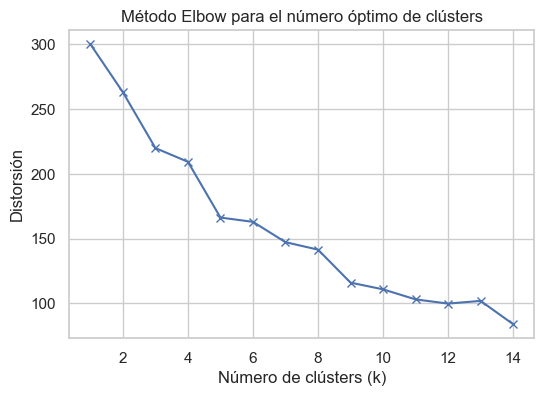

In [186]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Se supone que 'spotify' es tu DataFrame y 'spotify_numeric' es la versión numérica estandarizada

# Método Elbow para encontrar el número óptimo de clústers
distortions = []
K = range(1,15) # Elegimos un rango, por ejemplo de 1 a 15 clústers
for k in K:
    kmeanModel = MiniBatchKMeans(n_clusters=k, n_init=3)
    kmeanModel.fit(spotify_numeric)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clústers (k)')
plt.ylabel('Distorsión')
plt.title('Método Elbow para el número óptimo de clústers')
plt.show()


##### 4.1.2.3 Interpretación de los Resultados del Método Elbow

Al observar el gráfico generado por el Método Elbow para nuestros datos, notamos que la distorsión disminuye rápidamente desde 2 hasta aproximadamente 6 clusters. Posteriormente, la tasa de disminución de la distorsión comienza a nivelarse y se estabiliza. El "codo" del gráfico, que indica el punto en el que la reducción de la distorsión empieza a ser menos significativa al agregar más clusters, parece estar alrededor de k=6.

Esto sugiere que el número óptimo de clusters para nuestro conjunto de datos es 6. Al seleccionar este valor para k, logramos un equilibrio entre evitar una sobresegmentación (tener demasiados clusters) y asegurarnos de que las estructuras clave en nuestros datos estén bien representadas. Es decir, con 6 clusters, podemos capturar patrones y agrupaciones significativas en los datos sin añadir una complejidad innecesaria.

#### 4.1.3 Clasificación con el modelo

In [224]:
n_clusters = 6
kmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init= 3,  random_state=0).fit(features_scaled)

In [225]:
spotify['Cluster'] = kmeans.labels_

#### 4.1.4 Matriz de confusión

#### 4.1.5 Gráficos

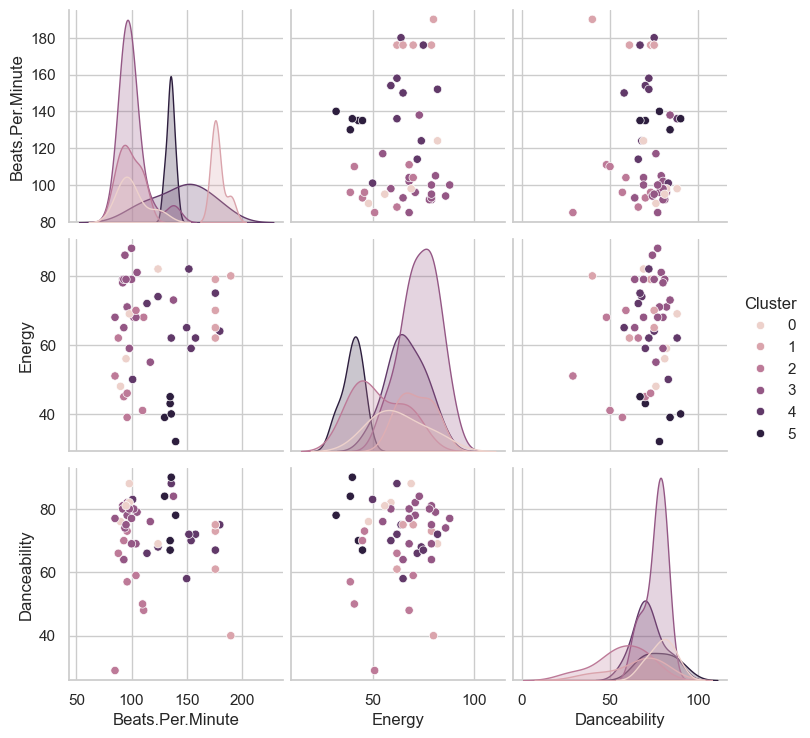

In [226]:
sns.pairplot(spotify, hue='Cluster', vars=['Beats.Per.Minute', 'Energy', 'Danceability'])
plt.show()

In [ ]:
print(spotify[['Track.Name', 'Artist.Name', 'Cluster']].head())

### 4.2 Análisis Hierarchical Clustering

#### 4.2.1 Justificacion

### 4.3 Análisis Density-Based Clustering: DBSCAN

#### 4.3.1 Justificacion

## 5. Conclusiones

¿Qué diferencia hay entre el conjunto inicial y el final? ¿Qué tan importante es lanormalización en este proceso?

¿Qué puede concluir respecto de ambos métodos utilizados?, ¿entregan resultados similares?
saque conclusiones del trabajo realizado.